In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


## Exercício 1 - Treinamento do modelo baseado em árvore de decisão
Neste exercício, você irá treinar um modelo de árvore de decisão utilizando o conjunto de dados MNIST. O objetivo é entender como funciona o processo de treinamento de um modelo de árvore de decisão e como ajustar os parâmetros para melhorar o desempenho do modelo.

Você irá:

*   Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.

*   Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).

*   Configurar os parâmetros do modelo, como a profundidade da árvore, o número de características a considerar em cada nó, etc.

*   Treinar o modelo utilizando o conjunto de dados de treinamento.


Dicas:

*   Certifique-se de que os dados estejam pré-processados corretamente antes de treinar o modelo.
*   Ajuste os parâmetros do modelo, como a profundidade da árvore, para melhorar o desempenho do modelo.

In [2]:
# Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário:
from sklearn.datasets import load_digits
mnist = load_digits()
X = mnist.data
y = mnist.target

print(X)
# Pré-processamento dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


Inicialmente, será criada uma árvore de decisão sem alterar os parâmetros default, apenas para um primeiro contato com a ferramenta:

In [3]:
# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

Precisão: 0.8416666666666667
[[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 25  3  2  1  0  1  1  0]
 [ 0  0  1 29  0  0  0  1  2  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0  0  1  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  3  0  1  0  1  0  0 21  4]
 [ 0  1  0  3  2  0  0  2  0 32]]


Agora, será utilizado o método GridSearchCV para fazer uma validação cruzada dos dados. O objetivo é obter a árvore com melhor acurácia quando se alteram os valores:
- max_depth: profundidade máxima da árvore (valores testados: 5, 10, 15 e 20),
- min_samples_split: mínimo de amostras necessárias para que um nó seja dividido (valores testados: 2, 5 e 10)
- min_samples_leaf: número mínimo de amostras que uma folha deve ter (valores testados: 1, 2 e 4)

In [10]:
parametros = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

validacao_cruzada = GridSearchCV(estimator = clf, param_grid = parametros, cv = 5, scoring='accuracy')
validacao_cruzada.fit(X_train, y_train)

print(f'A melhor acurácia obtida foi de {validacao_cruzada.best_score_}')
print(f'Os valores dos parâmetros que resultaram na melhor acurácia foram: {validacao_cruzada.best_params_}')
print('Matriz de confusão:')
print(confusion_matrix(y_test, y_pred))

A melhor acurácia obtida foi de 0.8538472706155632
Os valores dos parâmetros que resultaram na melhor acurácia foram: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Matriz de confusão:
[[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 25  3  2  1  0  1  1  0]
 [ 0  0  1 29  0  0  0  1  2  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0  0  1  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  3  0  1  0  1  0  0 21  4]
 [ 0  1  0  3  2  0  0  2  0 32]]


#### Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble
Neste exercício, você irá avaliar os ganhos obtidos ao utilizar modelos Ensemble em comparação com o modelo de árvore de decisão simples. Você irá treinar um modelo Ensemble e comparar os resultados com o modelo de árvore de decisão treinado anteriormente.

*Dicas:*
- Utilize diferentes tipos de modelos Ensemble, como Random Forest e XGBoost, para comparar os resultados.

Abaixo, utilizam-se os métodos Random Forest, Gradient Boosting e XGBoost para se comparar os resultados.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Floresta aleatória
floresta = RandomForestClassifier(n_estimators=100, random_state=42)
floresta.fit(X_train, y_train)
y_pred = floresta.predict(X_test)
print('Floresta aleatória:')
print(confusion_matrix(y_test, y_pred))
print(floresta.score(X_test, y_test))

# Gradient Boosting
gradiente = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=1, random_state=0)
gradiente.fit(X_train, y_train)
y_pred = gradiente.predict(X_test)
print('\nGradient Boosting:')
print(confusion_matrix(y_test, y_pred))
print(gradiente.score(X_test, y_test))

# XGBoosting
xgboost = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=1, random_state=0)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
print('\nXGBoost:')
print(confusion_matrix(y_test, y_pred))
print(xgboost.score(X_test, y_test))

Floresta aleatória:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
0.9722222222222222

Gradient Boosting:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  0  1  0  0  0]
 [ 0  2  0  0 43  0  1  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  3  0 37]]
0.9611111111111111

XGBoost:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  1  0 33  0  0  0  0  0  0]
 [ 0  2  0  0 43  0  1  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0

Os três métodos apresentaram valores próximos de acurácia. A Random Forest teve a maior acurácia.

#### Exercício 3 - Visualização da árvore de decisão e Medida de Impureza
Neste exercício, você irá explorar a estrutura da árvore de decisão e entender como a medida de impureza é utilizada para avaliar a qualidade das divisões nos nós da árvore. A medida de impureza é um conceito fundamental em árvores de decisão, pois ajuda a determinar a melhor forma de dividir os dados em subconjuntos menores e mais homogêneos.

**Você irá:**
1. Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn ou o Graphviz.
2. Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.
3. Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.
4. Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.


Primeiramente, será utilizada a função plot_tree do sklearn.tree para visualizar a árvore obtida no exercício 1

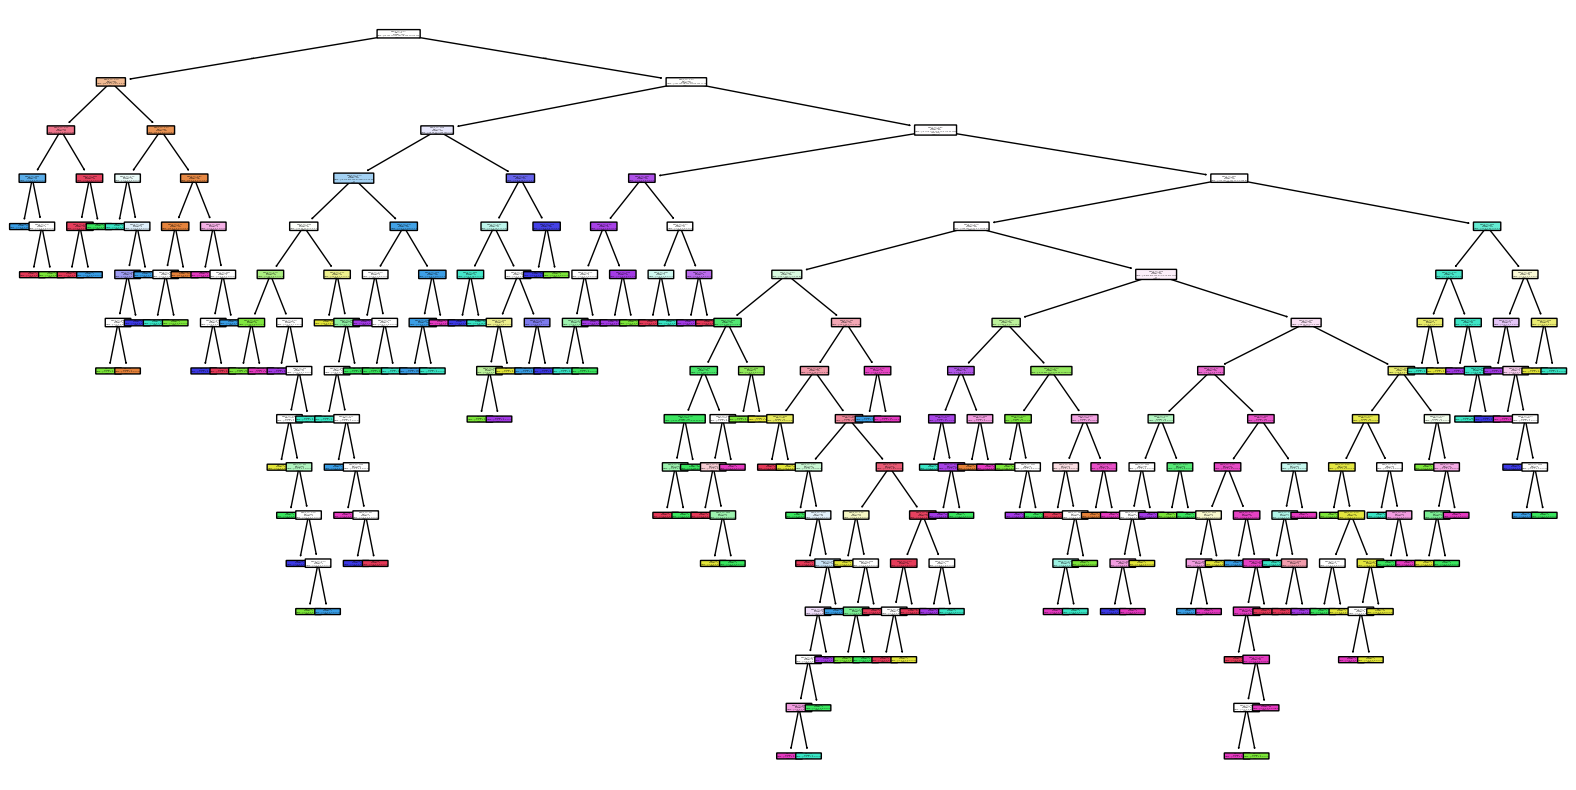

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = mnist.feature_names
class_names = list(map(str, mnist.target_names))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

A visualização não ficou satisfatória, pois a quantidade de elementos é muito grande e a leitura ficou prejudicada.
Alternativamente, utiliza-se abaixo a função export_graphviz

In [21]:
import graphviz
from sklearn.tree import export_graphviz

# Gera o arquivo DOT da árvore de decisão
dot_data = export_graphviz(clf, 
                           out_file=None,  
                           feature_names=feature_names, 
                           class_names=class_names, 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Converte o arquivo DOT em uma imagem visualizável
graph = graphviz.Source(dot_data)

# Salva a árvore de decisão como um arquivo PNG
graph.render("decision_tree", format="png")  # Salva como decision_tree.png


'decision_tree.png'

A função acima gerou um arquivo png muito mais legível. Ele pode ser encontrado no diretório "notebooks" com o nome decision_tree.png.

Observando-se a figura, nota-se que todos os nós folha possuem índice Gini de 0.0, ou seja, todos os nós folhas são "puros", i.e., possuem apenas dados de uma única classe. O nó raiz apresenta índice Gini de 0.9, isso significa que este nó é altamente impuro e possui uma distribuição uniforme entre as classes (aproximadamente mesma quantidade de amostra para cada classe).

O algoritmo busca o atributo que gera maior redução de pureza ao dividir o conjunto em subconjuntos. Para cada nó filho, a impureza é menor do que a a impureza do nó pai.

A medida de impureza pode ser utilizada para prevenção de overfitting ao se limitar o crescimento da árvore, evitando-se nós folhas muito puros. Os parâmetros max_depth, min_samples_split e min_samples_leaf podem ser utilizados para redução de overfitting.

#### Salvamento do modelo em arquivo pickle

O modelo será salvo por meio do código abaixo em um arquivo "modelo.pkl" para poder ser utilizado posteriormente.

In [8]:
import pickle as pk

# Salvar o modelo em arquivo pickle:
with open('modelo.pkl', 'wb') as pickle_file:
    pk.dump(floresta, pickle_file)


#### Exercício 4 - Preparação do container para deploy do modelo
Neste exercício, você irá aprender a preparar um container Docker para deploy do modelo de árvore de decisão treinado. Isso envolve criar um ambiente isolado e portável que possa ser facilmente implantado em diferentes contextos.

Você irá:

Criar um arquivo Dockerfile que define as instruções para construir a imagem do container.
Especificar as dependências necessárias para o modelo, incluindo bibliotecas e frameworks.
Configurar o ambiente de execução do modelo, incluindo a definição de variáveis de ambiente e a configuração de portas.
Construir a imagem do container utilizando o comando docker build.
Executar o container utilizando o comando docker run e testar a imagem.
Dicas:

Certifique-se de que o arquivo Dockerfile esteja configurado corretamente para construir a imagem do container.

O Docker File pode ser visualizado no arquivo "Dockerfile" do Codespace.
A única alteração em relação ao Docker File original do exercício foi a utilização da porta 9999.

#### Exercício 5 - Deploy do modelo usando Flask utilizando uma imagem docker
Neste exercício, você irá aprender a deployar o modelo de árvore de decisão treinado utilizando o framework Flask e uma imagem Docker. Isso envolve criar uma API REST que permita realizar inferências com o modelo e entender como funciona o processo de deploy de um modelo em um ambiente de produção.

Você irá:
1. Criar uma aplicação Flask que carregue o modelo treinado e o utilize para realizar inferências.
2. Definir uma API REST que permita enviar solicitações de inferência ao modelo e receber respostas.
3. Configurar a aplicação Flask dentro da imagem Docker do exercício anterior.
4. Deployar a aplicação Flask no container Docker e testar a API REST.
5. Entender como funciona o processo de deploy de um modelo em um ambiente de produção, incluindo a configuração de variáveis de ambiente e a gestão de dependências.

A aplicação criada no arquivo "main.py"

#### Exercício 6 - Notebook cliente com inferência direto do servidor
Neste exercício, você irá aprender a criar um notebook cliente que realize inferências direto do servidor onde o modelo de árvore de decisão foi deployado. Isso envolve entender como funciona o processo de comunicação entre o cliente e o servidor e como realizar inferências com o modelo deployado.

Você irá:

Criar um notebook cliente.
Importar as bibliotecas necessárias para realizar inferências com o modelo, incluindo a biblioteca requests para enviar solicitações HTTP ao servidor criado no exercício anterior.
Configurar o notebook cliente para se conectar ao servidor onde o modelo foi deployado.
Enviar solicitações de inferência ao servidor utilizando a API REST criada no exercício anterior.
Receber as respostas do servidor e visualizar os resultados das inferências.

A aplicação foi criada no notebook "notebook_cliente.ipynb"